# ORIE 5355/INFO 5370 HW 4: Experimentation

 - Name: Ruize Hou
 - Net-id: rh553
 - Date: 10/30/2022
 - Late days used for this assignment: 2
 - Total late days used (counting this assignment): 3
 - People with whom you discussed this assignment: 

After you finish the homework, please complete the following (short, anonymous) post-homework survey: https://forms.gle/4VktRpcRxxc7JCsD9 and include the survey completion code below.

### Question 0 [1 points]
<font color='blue'> Survey completion code: hw4_2021dfg

# Conceptual component [6 points]

### Personal reflection

<font color='blue'> Think back to a time that you wanted to evaluate an idea or product. If you have not had such an idea before, you may answer these questions about an article in the news that reported such a feature, or a feature that you think might be in deployment at a company or organization with which you interact (for example, Amazon, Google, Facebook, etc). 

<font color='blue'> Briefly summarize the scenario in no more than two sentences. 

We want to test an implementation of a new icon on the B2B lending app. We want to see whether the new icon will give us a higher conversion rate.

<font color='blue'> What was the objective that you cared about/wanted to optimize with the product/idea? What was the measurement that you could feasibly measure during the experimental period? In what ways did the measurement not match the objective you cared about? Answer in no more than 3 sentences.  

We want to improve the user conversion rate by using a new icon in the service browsing stage. We want to calculate the portion of users who reach the icon site that clicked on the icon. The measurement aligns with our objective.

<font color='blue'> Did the setting have interference (such as due to a network setting, interference through a 2 sided marketplace or capacity constraints, etc.)? If so, how did it effect your experimental design and results? If your answer is no, why are you sure that such interference did not happen? Answer in no more than 3 sentences.  

It is possible that there is interference through network effect and competition. Because since our company is an online shopping platform, our business users are all individual brands or retailers that may be connected. Also, there might exist competition that a treated user is converted to a lending service user will incent the control group to also pursue the service.

<font color='blue'> Given what we have learned in class so far, what would you do differently if faced with the same scenario again? Answer in no more than 3 sentences. 

I will probably use cluster randomization technique to minize the interference caused by network effect. I will make connections between possible substitutes as the network.

# Programming component

## Helper code

In [1]:
import numpy as np
import pandas as pd
import os, sys, math
import matplotlib.pyplot as plt

In [2]:
df_headlines = pd.read_csv('headline-experiment-heds.csv')
df = pd.read_csv('headline-experiment-impressions.csv')

In [3]:
for x in df_headlines.hed:
    print(x)

She's Not Just Destined For Greatness, She's Destined To Do Great Things For Women
This Young Woman Just Took Silicon Valley By Storm And She's Not Stopping There
Feminism 101: This Girl Is Going Places And She's Taking Other Girls With Her 
Remember When Math Was "Too Hard" For The Ladies? Not So Much.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14950 entries, 0 to 14949
Data columns (total 2 columns):
hed      14950 non-null int64
click    14950 non-null int64
dtypes: int64(2)
memory usage: 233.7 KB


In [5]:
df.hed.value_counts()

3    3763
1    3756
4    3737
2    3694
Name: hed, dtype: int64

In [6]:
df.groupby('hed')['click'].mean()

hed
1    0.010650
2    0.006497
3    0.010098
4    0.004549
Name: click, dtype: float64

df_headlines has a list of 4 headlines for the same article from Upworthy. df is a dataframe where each row represents a user. `hed` indicates which headline was shown to the user, and `click` is a binary indicator for whether the user clicked on the headline. A `1` represents a click, and so, for example, headline 2 was clicked on 0.6\% of the time. Each headline was shown to about 3700 users.

I recommend reading the following post: https://towardsdatascience.com/ab-testing-with-python-e5964dd66143

In this homework, we will only be working with the first two headlines:

In [7]:
df = df.query('hed==1 or hed==2')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7450 entries, 1 to 14949
Data columns (total 2 columns):
hed      7450 non-null int64
click    7450 non-null int64
dtypes: int64(2)
memory usage: 174.6 KB


# Problem 1: Simple A/B tests, and dependence on sample size

## Problem 1a: Simple A/B testing (3 pts)

First, what do the results look like if we use all the data?

Here, you will want to use the functions under "4. Testing the hypothesis" in the above blog post. In particular you will want to test the "1 sided" hypothesis that headline 1 is better than headline 2. (In statsmodels.stats.proportion.proportions_ztest, use alternative='larger', and put headline 1 first in the data.)

https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html


<font color='blue'> If you use all the data (all the entries in the dataframe), what is the mean click through rate for each headline?

In [12]:
head1 = df.query('hed == 1')
head2 = df.query('hed == 2')
mean_head1 = np.mean(head1['click'])
mean_head2 = np.mean(head2['click'])
print("mean click through rate for headline 1 is", np.mean(head1['click']))
print("mean click through rate for headline 2 is", np.mean(head2['click']))

mean click through rate for headline 1 is 0.010649627263045794
mean click through rate for headline 2 is 0.006497022198159177


<font color='blue'> If you use all the data, what is the p-value for the hypothesis that the first headline is better than the second headline?

In [13]:
from statsmodels.stats.proportion import proportions_ztest

In [23]:
mean_head2

0.006497022198159177

In [51]:
clicks = [head1['click'].sum(), head2['click'].sum()]
nobs = [len(head1), len(head2)]

In [52]:
stat, pval = proportions_ztest(clicks, nobs, alternative = 'larger')

In [53]:
pval

0.026077716204709694

<font color='blue'> If you use all the data, what are the confidence intervals for the click through rates for each headline?

For example, we got Headline 1: (0.0074, 0.0139)

In [26]:
from statsmodels.stats.proportion import proportion_confint

In [54]:
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(clicks, nobs=nobs, alpha=0.05)

In [57]:
print(f'ci 95% for headline1 group: [{lower_con:.4f}, {upper_con:.4f}]')
print(f'ci 95% for headline2 group: [{lower_treat:.4f}, {upper_treat:.4f}]')

ci 95% for headline1 group: [0.0074, 0.0139]
ci 95% for headline2 group: [0.0039, 0.0091]


<font color='blue'> Interpret the above, in no more than 3 sentences

We can see that using the whole sample, our result shows that the click on headline1 is significantly larger than click on headline2 under 0.05 significancy level as the p-value 0.026 is smaller than 0.05. We can also see that the mean of headline is not captured by the 95% confidence interval for headline1, which also tells us headline1 is significantly better than headline2.

## Problem 1b: Experimentation with lower sample sizes (3 pts)

Now, we'll see how often we would make the "wrong" decision if we instead had run an experiment with a lower sample size. We do this via a method called "bootstrapping" -- we 're-sample' from the data that we actually saw, in order to estimate what would have happened via counter-factual experiments.  

<font color='blue'> Complete the following function, which does the following: it simulates 1000 fake experiments; each fake experiment, we sample `overall_sample_size` users and pretend that those users made up the experiment. 
    
<font color='blue'> We want to store:
    
- the distribution of click-through-rate estimates for each headline (we do this for you)

- the fraction of experiments in which headline 1 was found to be better than headline 2

Here, we're going to say the experiment found that headline 1 was better than headline 2 if it had a higher click fraction, even if it wasn't statistically significant (regardless of p value).

In [104]:
def get_estimates_from_bootstrapping(df, overall_sample_size = 100):
    estimates = {hed: [] for hed in df.hed.unique()} # for each headline, store the mean estimates
    number_of_headlines_1_better_than_2 = 0
    for _ in range(1000): # simulate 1000 fake experiments ("bootstrapping")
        df_sample = df.sample(overall_sample_size)
        means = df_sample.groupby('hed')['click'].mean()
        for en, mean in enumerate(means):
            estimates[en+1].append(mean)
        ### TODO complete code here for number_of_headlines_1_better_than_2
        #number_of_headlines_1_better_than_2 += df_sample.query('hed == 1')['click'].mean() - df_sample.query('hed == 2')['click'].mean()
        mean_head1 = means[1]
        mean_head2 = means[2]
        if mean_head1 > mean_head2:
            number_of_headlines_1_better_than_2 += 1
            
    
    return estimates, number_of_headlines_1_better_than_2/1000
    

In [97]:
means = df.groupby('hed')['click'].mean()

In [100]:
means[1]>means[2]

True

<font color='blue'> For each of overall_sample_size in [100, 1000, 5000] plot a histogram of the estimates for each headline. You should have 3 plots, each plot corresponding to 1 sample size number and containing 2 histograms, 1 for each headline.




In [62]:
sample_size_numbers = list(range(100, 6000, 500))

In [63]:
estimates, number_of_headlines_1_better_than_2 = get_estimates_from_bootstrapping(df, overall_sample_size = 100)

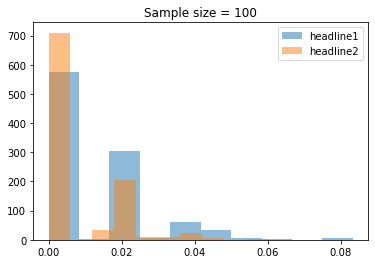

In [72]:
plt.hist(estimates[1], alpha=0.5, label='headline1')
plt.hist(estimates[2], alpha=0.5, label='headline2')
plt.title('Sample size = 100')
plt.legend(loc='upper right')
plt.show()

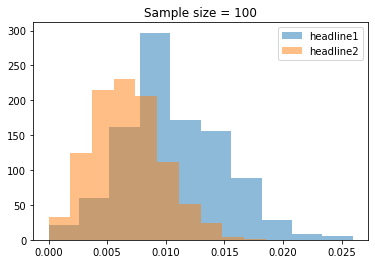

In [73]:
estimates, number_of_headlines_1_better_than_2 = get_estimates_from_bootstrapping(df, overall_sample_size = 1000)
plt.hist(estimates[1], alpha=0.5, label='headline1')
plt.hist(estimates[2], alpha=0.5, label='headline2')
plt.title('Sample size = 100')
plt.legend(loc='upper right')
plt.show()

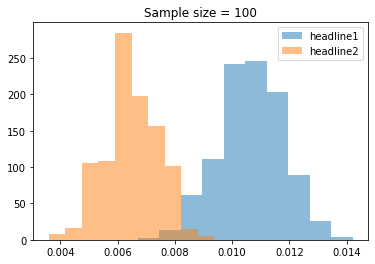

In [74]:
estimates, number_of_headlines_1_better_than_2 = get_estimates_from_bootstrapping(df, overall_sample_size = 5000)
plt.hist(estimates[1], alpha=0.5, label='headline1')
plt.hist(estimates[2], alpha=0.5, label='headline2')
plt.title('Sample size = 100')
plt.legend(loc='upper right')
plt.show()

<font color='blue'> For each of overall_sample_size in sample_size_numbers, get the fraction of experiments in which headline 1 was found to be better than headline 2. Plot a line plot where the X axis is the sample size, and the Y axis is the fraction of times. Note that this code might take a minute or so to run. Note: your line plot should be increasing in the sample size (Why?)

For example, with 100 samples, we got: ~0.36. For 1100 samples, we got  0.788. 


In [110]:
estimates, number_of_headlines_1_better_than_2 = get_estimates_from_bootstrapping(df, overall_sample_size = 1100)
number_of_headlines_1_better_than_2

0.818

In [111]:
fraction_better = []
for n in sample_size_numbers:
    estimates, number_of_headlines_1_better_than_2 = get_estimates_from_bootstrapping(df, overall_sample_size = n)
    fraction_better.append(number_of_headlines_1_better_than_2)

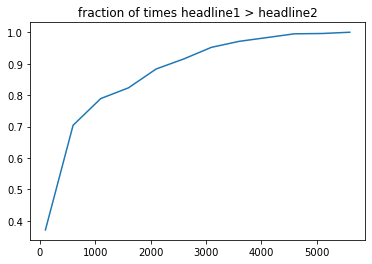

In [113]:
plt.plot(sample_size_numbers, fraction_better)
plt.title('fraction of times headline1 > headline2')
plt.show()

<font color='blue'> Intepret the above, in no more than 3 sentences.

We can see that the fraction of times headline1 has more clicks than headline2 is increasing with the sample size.

## Problem 2: Peeking (6 points)

Now, we'll illustrate the problem of "peeking" in experiments. Suppose you're a headline writer, and you personally wrote headline 2 and are now running the AB test. So, you have a maximum experiment budget of 2000 users. Each user comes in sequentially and is assigned either the first or second headline. Now, you also realize that experimentation is wasteful, and so you want to minimize the amount of time you're spending in the experiment.

So, you do the following: after each 20th user comes in and either clicks on the headline or doesn't, you check if headline 2 has a higher click fraction than headline 1. If it does, you declare victory and stop the experiment. Otherwise, you continue. 

Now, we'll want to calculate: how often does the above procedure lead to you declaring victory, that headline 2 is better than headline 1?

Here, we will walk you through simulating the above procedure. As before, we will simulate 1000 fake experiments, to get a good estimate of what the above procedure behaves like.  

<font color='blue'> Finish the below code, to calculate number_of_headlines_2_better_than_1 using the above procedure

In [214]:
number_of_headlines_2_better_than_1 = 0

for _ in range(1000): # simulate 1000 fake experiments
    df_sample = df.sample(2000)
    for number_users in range(20, 2001, 20):
        df_users_to_far = df_sample.iloc[0:number_users] #grab the first number_users users
        #TODO: calculate click fractions for each headline
        head1 = df_users_to_far.query('hed == 1')
        head2 = df_users_to_far.query('hed == 2')
        mean_head1 = head1['click'].mean()
        mean_head2 = head2['click'].mean()
        #TODO potentially end experiment. The "break" keyword in python might come in handy.
        # Note that you want to break the inner for loop but not the outer loop (think why). 
        # Note, you sometimes may get "unlucky", and all the first 20 users received the same headline. In that case, continue the experiment without checking the p-value
        if len(head1) == 0 or len(head2) == 0:
            pass
        else:
            clicks = [head2['click'].sum(), head1['click'].sum()]
            nobs = [len(head2),len(head1)]
            stat, pval = proportions_ztest(clicks, nobs, alternative = 'larger')
            if pval <= 0.05:
                number_of_headlines_2_better_than_1 += 1
                break

In [215]:
number_of_headlines_2_better_than_1

60

<font color='blue'> What fraction of the time does the above procedure declare that headline 2 is better than headline 1?

In [216]:
number_of_headlines_2_better_than_1/1000

0.06

<font color='blue'> Interpret the above answer, in no more than 3 sentences. What went wrong?

We found that by simply using the method of peeking, 6% of the time, we got a false positive result. We want to avoid false positives because we don't want to waste money to decrease our outcome. Simply using peeking will cause 6% of the time of the experiment to result in a false positive conclusion, so we definitely want to implement some fancy statistics to eliminate the number of false positives.

Note: In practice, peeking involves not just taking the mean click percentage but also calculating a p-value and only exiting the experiment if the desired direction is statistically significantly better than the other one. Similar results occur in that setting.